       Date        Open        High         Low       Close   Adj Close  \
0  1/1/1995  459.209991  471.359985  457.200012  470.420013  470.420013   
1  2/1/1995  470.420013  489.190002  469.290009  487.390015  487.390015   
2  3/1/1995  487.390015  508.149994  479.700012  500.709991  500.709991   
3  4/1/1995  500.700012  515.289978  500.200012  514.710022  514.710022   
4  5/1/1995  514.760010  533.409973  513.030029  533.400024  533.400024   

         Volume  
0  6.852060e+09  
1  6.330100e+09  
2  7.792400e+09  
3  6.307030e+09  
4  7.555690e+09  
       Date        Open        High         Low       Close        Volume
0  1/1/1995  459.209991  471.359985  457.200012  470.420013  6.852060e+09
1  2/1/1995  470.420013  489.190002  469.290009  487.390015  6.330100e+09
2  3/1/1995  487.390015  508.149994  479.700012  500.709991  7.792400e+09
3  4/1/1995  500.700012  515.289978  500.200012  514.710022  6.307030e+09
4  5/1/1995  514.760010  533.409973  513.030029  533.400024  7.555690e+

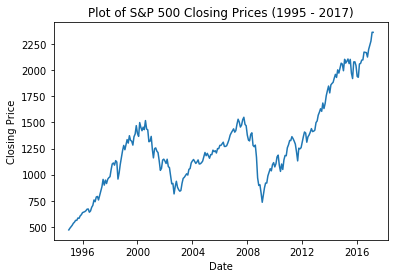

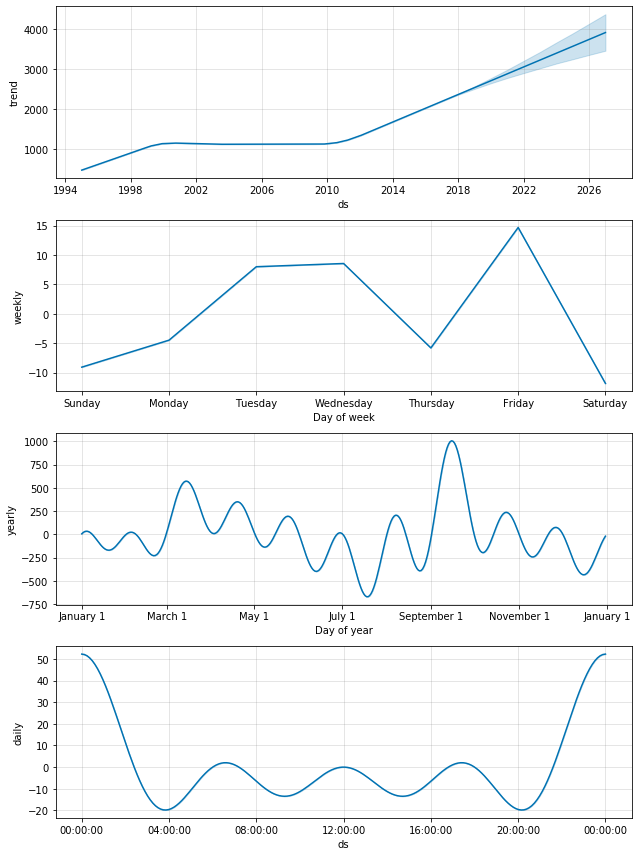

0.871630891065295


148.20829606622098

In [40]:
# Austin Dobbins
# S&P 500 Time Series Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from fbprophet import Prophet
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics


# Importing data into pandas dataframe

data = pd.read_csv(r'C:\Users\austi\OneDrive\Desktop\^GSPC.csv', parse_dates=True)
print(data.head())
# Because the adj close variable is almost exactly the same as the Close variable, we will drop this column from the
# set.

newdata = data.drop('Adj Close', axis=1)
print(newdata.head())

# Starting Time Series Analysis

# Convert Date Column from Object to Date/Time
print(newdata['Date'].head())
newdata['Date'] = pd.to_datetime(newdata['Date'])
print(newdata['Date'].head())

# Plotting S&P 500 Closing Price (1995 - 2017)
plt.plot(newdata['Date'], newdata['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Plot of S&P 500 Closing Prices (1995 - 2017)')
plt.show()

tsdata = newdata.rename(columns = {'Date': 'ds', 'Close': 'y'})

m = Prophet(growth = 'linear', weekly_seasonality=True, daily_seasonality=True)
m.fit(tsdata)

future = m.make_future_dataframe(periods = 10, freq = 'Y')
fcst = m.predict(future)

m.plot
m.plot_components(fcst)
plt.show()

fcst = fcst.drop([267,268,269,270,271,272,273,274,275,276], axis = 0)
fcst['yhat'].shape

print(r2_score(tsdata.y, fcst.yhat))

np.sqrt(metrics.mean_squared_error(tsdata.y, fcst.yhat))  


Pearson Correlation Test results between Volume and Close are: 
 (0.4184217589725636, 9.676802879954393e-13)
Pearson Correlation Test results between Open and Close are: 
 (0.9922348177866771, 6.323839595362682e-242)
Pearson Correlation Test results between High and Close are: 
 (0.9965377823268033, 2.7709542299438393e-288)


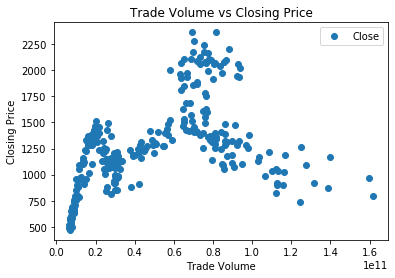

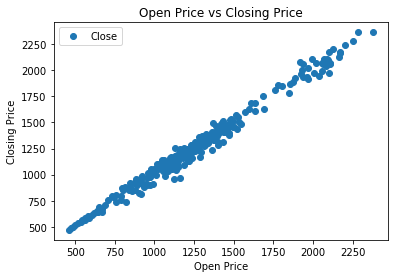

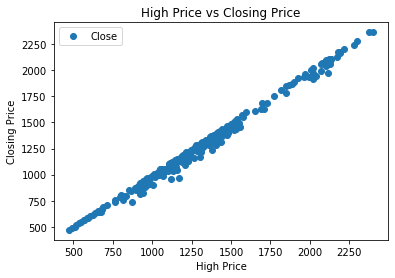

In [7]:
# Starting Regression Analysis

# Get the Pearson Correlation Value Between Each Variable and Target Variable: 'Close'

test1 = pearsonr(newdata['Volume'], newdata['Close'])
print('Pearson Correlation Test results between Volume and Close are: \n', test1)
test2 = pearsonr(newdata['Open'], newdata['Close'])
print('Pearson Correlation Test results between Open and Close are: \n', test2)
test3 = pearsonr(newdata['High'], newdata['Close'])
print('Pearson Correlation Test results between High and Close are: \n', test3)

# Create Visualizations to See Relationships Visually

# Trade Volume vs Closing Price
newdata.plot(x = 'Volume', y = 'Close', style = 'o')
plt.title('Trade Volume vs Closing Price')  
plt.xlabel('Trade Volume')  
plt.ylabel('Closing Price')  
plt.show()

# Opening Price vs Closing Price 
newdata.plot(x = 'Open', y = 'Close', style = 'o')
plt.title('Open Price vs Closing Price')  
plt.xlabel('Open Price')  
plt.ylabel('Closing Price')  
plt.show()

# High Price vs Closing Price 
newdata.plot(x = 'High', y = 'Close', style = 'o')
plt.title('High Price vs Closing Price')  
plt.xlabel('High Price')  
plt.ylabel('Closing Price')  
plt.show()

         Actual    Predicted
0   1073.869995  1471.401313
1   1239.939941  1147.825790
2   1416.180054  1380.550938
3    584.409973  1079.697966
4   2126.149902  1388.522390
..          ...          ...
76  1180.589966  1228.924896
77   914.619995  1112.214786
78  1058.199951  1160.986819
79  1378.550049  1506.548313
80  1270.199951  1302.970847

[81 rows x 2 columns]
         Actual    Predicted
0   1073.869995  1125.708774
1   1239.939941  1375.028296
2   1416.180054  1421.194086
3    584.409973   571.318743
4   2126.149902  2172.930950
..          ...          ...
76  1180.589966  1212.703181
77   914.619995   956.517254
78  1058.199951  1059.893107
79  1378.550049  1476.934946
80  1270.199951  1279.118509

[81 rows x 2 columns]
         Actual    Predicted
0   1073.869995  1118.174053
1   1239.939941  1342.331992
2   1416.180054  1399.767939
3    584.409973   559.748803
4   2126.149902  2129.330350
..          ...          ...
76  1180.589966  1196.217106
77   914.619995   952.1565

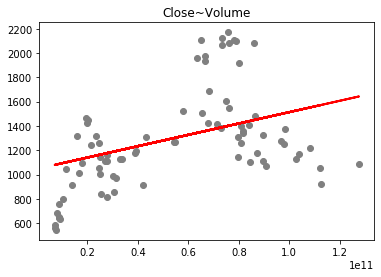

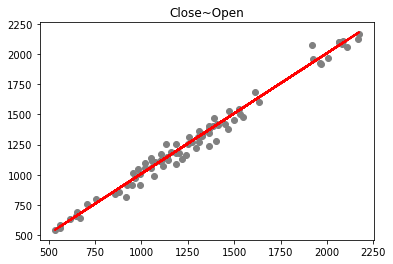

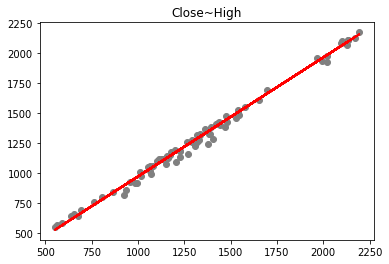

In [8]:
# Building Linear Regression Model 

x = newdata['Volume'].values.reshape(-1, 1)
y = newdata['Close'].values.reshape(-1, 1)

x2 = newdata['Open'].values.reshape(-1, 1)
y2 = newdata['Close'].values.reshape(-1, 1)

x3 = newdata['High'].values.reshape(-1, 1)
y3 = newdata['Close'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2)

regressor3 = LinearRegression()  
regressor3.fit(X_train3, y_train3)

y_pred = regressor.predict(X_test)

y_pred2 = regressor2.predict(X_test2)

y_pred3 = regressor3.predict(X_test3)


df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
print(df2)

df3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_pred3.flatten()})
print(df3)

# Plotting Straight Line with the Test Data

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Close~Volume')
plt.show()

plt.scatter(X_test2, y_test2,  color='gray')
plt.plot(X_test2, y_pred2, color='red', linewidth=2)
plt.title('Close~Open')
plt.show()

plt.scatter(X_test3, y_test3,  color='gray')
plt.plot(X_test3, y_pred3, color='red', linewidth=2)
plt.title('Close~High')
plt.show()

In [4]:
# Printing Evaluation Metrics For Each Model

print('Mean Absolute Error for Close~Volume:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error for Close~Volume:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error for Close~Volume:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared for Close~Volume:',metrics.r2_score(y_test, y_pred))

print('Mean Absolute Error for Close~Open:', metrics.mean_absolute_error(y_test2, y_pred2))  
print('Mean Squared Error for Close~Open:', metrics.mean_squared_error(y_test2, y_pred2))  
print('Root Mean Squared Error for Close~Open:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('R Squared for Close~Open:', metrics.r2_score(y_test2, y_pred2))

print('Mean Absolute Error for Close~High:', metrics.mean_absolute_error(y_test3, y_pred3))  
print('Mean Squared Error for Close~High:', metrics.mean_squared_error(y_test3, y_pred3))  
print('Root Mean Squared Error for Close~High:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print('R Squared for Close~High:', metrics.r2_score(y_test3, y_pred3))

Mean Absolute Error for Close~Volume: 284.8325106932202
Mean Squared Error for Close~Volume: 129279.95976479724
Root Mean Squared Error for Close~Volume: 359.55522491655887
R Squared for Close~Volume: 0.21606253219966898
Mean Absolute Error for Close~Open: 40.61485047334943
Mean Squared Error for Close~Open: 2883.903854773302
Root Mean Squared Error for Close~Open: 53.70199116209102
R Squared for Close~Open: 0.9825123685882658
Mean Absolute Error for Close~High: 27.192424359147616
Mean Squared Error for Close~High: 1153.7136296240885
Root Mean Squared Error for Close~High: 33.9663602645925
R Squared for Close~High: 0.9930040251944717
